<h1>Regressões</h1>

<p>O método de regressão é um dos mais antigos e mais utilizados em métodos analíticos quantitativos. O objetivo da regressão é produzir um modelo que melhor se ajusta a um conjunto de dados observado. Tipicamente, o modelo é uma função que descreve algum tipo de curva (linhas, parábolas etc.) e é determinado a partir de um conjunto de parâmetros. No caso da regressão linear, o modelo é a função linear e os parâmetros que o descrevem são o intercepto e inclinação.
<p>Em termos matemáticos, o objetivo da regressão é encontrar uma função de algumas variáveis ou atributos <span class="math inline">\(x_1, x_2...x_n\)</span>, que prediz o valor do rótulo <span class="math inline">\(y\)</span>. O valor predito do rótulo é denominado <span class="math inline">\(\hat{y}\)</span> e é dado por:</p>
<p><span class="math display">\[\hat{y} = f(x_1, x_2...x_n)\]</span></p>
<p>Inicialmente, a regressão <em>aprende</em> a função <span class="math inline">\(f(x_1, x_2...x_n)\)</span> a partir de dados de <strong>treinamento</strong>, ou seja, aqueles cujos valores dos rótulos y já são conhecidos. Uma vez aprendida a função (isto é, depois de determinar o intercepto e a inclinação no caso da função linear) queremos realizar predições de novos dados nunca vistos, que se encontram em outro conjunto de dados chamado conjunto de <strong>teste</strong>.</p>
<p>Neste caderno você fará um breve exercício sobre regressões lineares com uma base didática.</p>


## Regressão linear multivariada

<p>Queremos determinar os coeficientes angulares <span class="math inline">\(a_1, a_2...a_n\)</span> e o coeficiente linear (intercepto) <span class="math inline">\(a_0\)</span> do modelo de regressão linear a seguir:</p>
<p><span class="math display">\[\hat{y} = a_0 + a_1 \cdot x_1 + a_2 \cdot x_2 + ... + a_n \cdot x_n\]</span></p>

<p>Vamos usar uma base didática que reúne preços (rótulos ou y) de veículos automotivos e as suas características (atributos ou <span class="math inline">\(x_1, x_2...x_n\)</span>). </p>

Preencha as células seguintes com um ou mais comandos Python, para executar as tarefas pedidas em cada comentário. Execute as células com os comandos e mostre os resultados obtidos. Não se esqueça de importar as bibliotecas necessárias.

Você pode realizar a atividade com consulta.

In [85]:
# Importe a biblioteca pandas
import pandas as pd
# Carregue o arquivo Automobile_data.csv em um DataFrame
df = pd.read_csv("/content/Automobile_data.csv")

In [86]:
# Liste os nomes das colunas desse DataFrame
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

Como se vê, a base descreve diversas características de um conjunto de veículos, sendo que o último atributo (price) é o rótulo preço.

# Limpeza da base

Note que somente algumas das variáveis são numéricas. Note ainda que nossa variável alvo não é numérica, o que é um grande problema.

In [87]:
# Descubra o tipo da coluna price. Você pode mostrar o tipo da coluna inteira ou de um elemento dela.
df['price'].dtype

dtype('O')

In [88]:
# Delete todas as linhas (inteiras) do DataFrame onde a variável price não é do tipo numérico.

#Cria um novo dataframe para converter as variáveis para pd.to_numeric e em seguida identificar quais
#não foram convertidos, para, em seguida transformá-los em NaN para poder excluí-los
temp_numeric_price = pd.to_numeric(df['price'], errors='coerce')


#filtrar somente as linhas não nulas:
df_limpo = df[temp_numeric_price.notnull()].copy()
df_limpo

# 1. Identifica não numéricos em 'price' e os transforma em NaN
df['price_temp'] = pd.to_numeric(df['price'], errors='coerce')
# 2. Remove as linhas onde 'price_temp' é NaN
df_limpo_etapa1 = df[df['price_temp'].notnull()].copy()

In [89]:
# Converta o atributo price para o tipo float. Para isso, utilize o método pd.to_numeric() com o parâmetro downcast="float"
df_limpo_etapa1['price'] = df_limpo_etapa1['price_temp'].astype(float).astype(np.float32) # Garante float32
df_limpo_etapa1 = df_limpo_etapa1.drop(columns=['price_temp'])

In [90]:
# Repita os dois passos anteriores para o atributo horsepower
# 1. Identifica não numéricos em 'horsepower' e os transforma em NaN
df_limpo_etapa1['horsepower_temp'] = pd.to_numeric(df_limpo_etapa1['horsepower'], errors='coerce')
# 2. Remove as linhas onde 'horsepower_temp' é NaN (agora aplicamos no df_limpo_etapa1)
df_limpo_etapa2 = df_limpo_etapa1[df_limpo_etapa1['horsepower_temp'].notnull()].copy()
# 3. Converte a coluna 'horsepower' no DataFrame já limpo
df_limpo_etapa2['horsepower'] = df_limpo_etapa2['horsepower_temp'].astype(float).astype(np.float32) # Garante float32
df_limpo_etapa2 = df_limpo_etapa2.drop(columns=['horsepower_temp']) # Remove a coluna temp

In [91]:
# Importe a biblioteca numpy
import numpy as np
# Crie uma nova coluna chamada logPrice igual ao logaritmo natural do preço utilizando a função np.log
df_limpo_etapa2['logPrice'] = np.log(df_limpo_etapa1['price'])

Agora vamos normalizar alguns atributos.

In [92]:
# Construa um array Numpy (objeto do tipo numpy.ndarray) chamado "valores" com as colunas 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg'
# do DataFrame original. Para isso, utilize o método to_numpy() do pandas
colunas_array = ['engine-size', 'horsepower', 'city-mpg', 'highway-mpg']
valores = df_limpo_etapa2[colunas_array].to_numpy()


In [93]:
df_final = df_limpo_etapa2.dropna(subset=colunas_array).copy()


In [94]:
# Use o Numpy para calcular a média (mean) das LINHAS do array e atribua esse array unidimensional
# a uma variável chamada "medias". Utilize os parâmetro axis=1 e keepdims=True ao chamar o método do numpy
###keepdims será útil para a próxima questão
medias = np.mean(valores, axis=1, keepdims=True)


In [95]:
# Use o Numpy para calcular o desvio-padrão (std) das LINHAS do array.
# Utilize os parâmetro axis=1 e keepdims=True ao chamar o método do numpy
# Atribua esse array unidimensional a uma variável chamada "std".
std = np.std(valores, axis=1, keepdims = True)


In [96]:
# Calcule um novo array chamado "X" a partir de (valores - medias) / std.
# Estes são os valores normalizados que formam a matriz de atributos.
X = (valores - medias) / std

Agora vamos preparar as bases de treinamento e teste.

In [97]:
# importe a classe train_test_split da biblioteca de machine learning Scikit-learn
# Para isso, utilize o comando abaixo
from sklearn.model_selection import train_test_split

A documentação desse método está disponível em:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [98]:
# Crie uma variável do tipo numpy.ndarray com o nome "y" a partir da coluna logPrice utilizando o método to_numpy()
y = df_final['logPrice'].to_numpy()

In [99]:
# Use a classe train_test_split da biblioteca de machine learning Scikit-learn.
# Esse passo pode ser visualizado na segunda célula da documentação do método, conforme link acima
# Gere 4 arrays a partir de X e y.
# Os arrays serão X_train, X_test, y_train e y_test, nesta ordem.
# Os arrays do conjunto de teste X_test e y_test serão 25% da amostra (test_size=0.25).
# Use random_state = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [100]:
# importe a classe LinearRegression do Scikit-learn para ajustar (fit) um modelo de regressão linear.
# utilize o comando abaixo para importar a classe:
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

A documentação desse método está disponível em:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression

Use a classe LinearRegression do Scikit-learn para ajustar (fit) um modelo de regressão linear no conjunto de TREINAMENTO.

In [101]:
# Utilize a função LinearRegression().fit() para as variáveis do conjunto de treinamento (X_train e y_train).
# Use valores default em todos os parâmetros da classe.
# o novo objeto da regressão deve ser denominado "reg"
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [110]:
# Qual é o valor do coefiente de determinação R2 obtido? Utilize o método score
reg.score(X_train, y_train)

0.4543798403279449

In [111]:
# Quais são os valores do coeficientes obtidos? Utilize o atributo coef_
reg.coef_

array([-1.11616552, -0.57138957,  4.5704407 , -2.88288561])

In [112]:
# Qual é o valor do intercepto desse modelo? Utilize o atributo intercept_
reg.intercept_

np.float64(13.326268644171337)

Use a classe LinearRegression do Scikit-learn para ajustar (fit) um modelo de regressão linear no conjunto de TESTE.

In [113]:
# Utilize a função LinearRegression().fit() para as variáveis do conjunto de teste (X_test e y_test).
# Use valores default em todos os parâmetros da classe.
# o novo objeto da regressão deve ser denominado "reg2"
reg2 = LinearRegression()
reg2.fit(X_test, y_test)

LinearRegression()

In [114]:
# Faça a predição com o modelo ajustado (treinado) no conjunto de TESTE. Utilize o método predict
y_pred = reg.predict(X_test)


In [116]:
# Qual é o valor de R2 entre o X e o y do conjunto de teste? Utilize o método score
r2_score = reg.score(X_test, y_test)
r2_score

0.37613917711066047

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

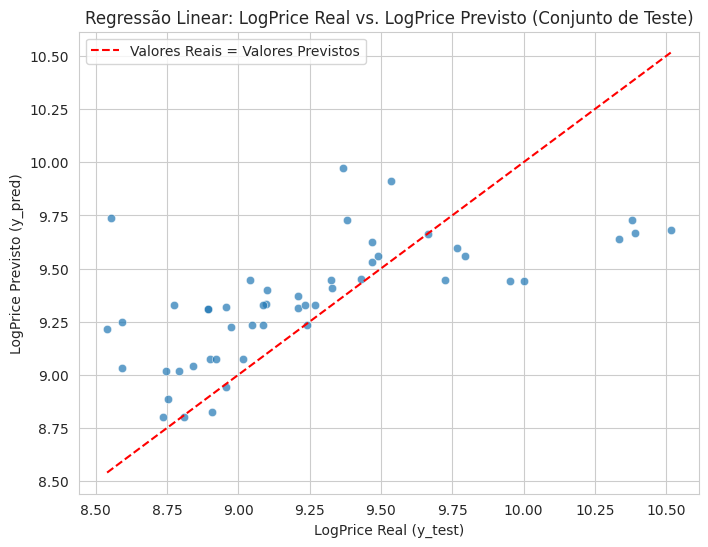

In [118]:
# 1. Configurar o estilo do gráfico
sns.set_style("whitegrid")

# 2. Criar o plot de dispersão
plt.figure(figsize=(8, 6))

# Plotar os pontos: valores reais (y_test) no eixo X e valores previstos (y_pred) no eixo Y
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

# Adicionar uma linha de referência y=x (onde o valor real é igual ao previsto)
#ajuda a visualizar quão bem as predições se alinham com os valores reais.
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Valores Reais = Valores Previstos')

# 3. Adicionar rótulos e título
plt.xlabel("LogPrice Real (y_test)")
plt.ylabel("LogPrice Previsto (y_pred)")
plt.title("Regressão Linear: LogPrice Real vs. LogPrice Previsto (Conjunto de Teste)")
plt.legend()
plt.grid(True) # Exibe a grade

# 4. Mostrar o gráfico
plt.show()

FIM DA ATIVIDADE. Você acabou de treinar um modelo de aprendizado de máquina (regressão linear).

O R2 indica o percentual de bom ajuste entre o modelo treinado e o conjunto de dados.